# Emission Analysis Report

## Overview

This report provides an in-depth analysis of greenhouse gas emissions data. We analyzed emissions across various regions, ANZSIC descriptors, and over time, utilizing multiple visualizations and statistical techniques.

## Data Preparation

The dataset includes columns for region, ANZSIC descriptor, sub-industry, household category, gas type, units, magnitude, year, and emissions values (`data_val`). The data was cleaned and processed to facilitate analysis.

## Key Insights

### 1. Emissions Distribution by Region
- **Top Region Analysis**: Auckland is highlighted as the region with the highest emissions.
- **Pie Charts**: 
  - **2007**: Shows Auckland's share of global emissions in 2007.
  - **2022**: Shows Auckland's share of global emissions in 2022.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv(r"C:/Users/Zana/Desktop/projectData/cleaned_greenhouse_data.csv")
df.head()

,region,anzsic_descriptor,sub_industry,household_category,gas,units,magnitude,year,data_val
0,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2007,45.92
1,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,45.88
2,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,43.71
3,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,39.61
4,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,40.99


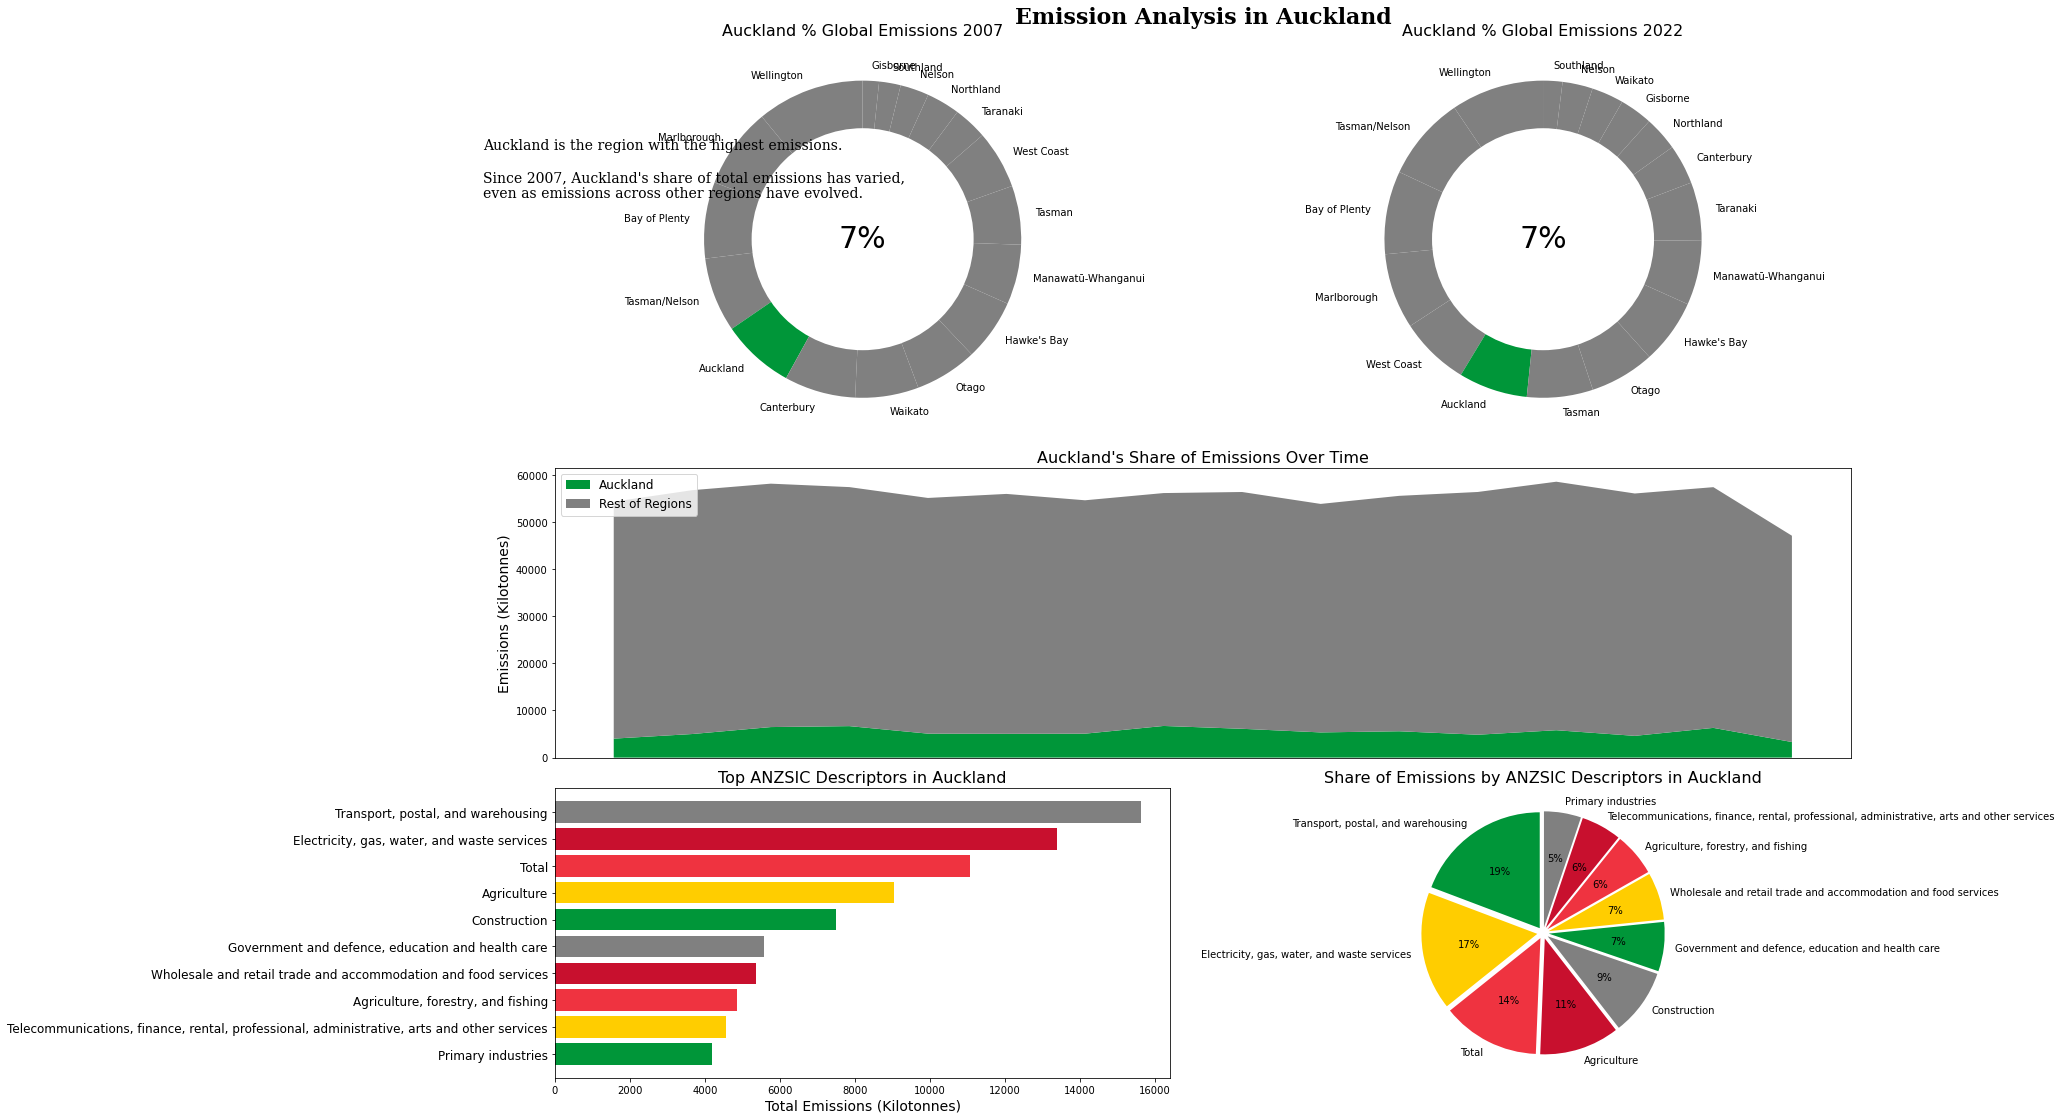

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Sample data preparation (replace with your actual data)
top_region = 'Auckland'
top_region_data = df[df['region'] == top_region]
region_vs_others = df.groupby(['year', 'region'])['data_val'].sum().unstack().fillna(0)

# Exclude the "rest_of_world" from the pie charts
region_vs_others = region_vs_others[region_vs_others.columns.difference(['rest_of_world'])]

# Get the top 10 ANZSIC descriptors in the top region, excluding "Total"
top_anzsic_descriptors = top_region_data.groupby('anzsic_descriptor')['data_val'].sum().sort_values(ascending=False).head(10)

# Define figure and grid with a larger size
fig = plt.figure(figsize=(20, 16))  # Further increase figure size
gs = gridspec.GridSpec(nrows=10, ncols=6)

# Title and text
fig.suptitle(f"Emission Analysis in {top_region}", fontsize=22, fontweight="bold", fontfamily='serif')

# Move the description to the yellow sticky note area
fig.text(.0, .80,  # Adjust these values to position the text inside the yellow area
f'''
{top_region} is the region with the highest emissions.

Since 2007, {top_region}'s share of total emissions has varied,
even as emissions across other regions have evolved.
'''
, fontsize=14, fontweight='light', fontfamily='serif')

# Pie chart for the top region's share in the starting year
ax1 = fig.add_subplot(gs[0:4, 0:3])
data_2007 = region_vs_others.loc[2007].sort_values(ascending=False)
ax1.pie(
    data_2007,
    startangle=90,
    labels=data_2007.index,
    labeldistance=1.1,
    pctdistance=.85,
    colors=["#009639" if region == top_region else "grey" for region in data_2007.index]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((region_vs_others.loc[2007, top_region] / region_vs_others.loc[2007].sum() * 100))}%", 
    ha='center', 
    va='center', 
    fontsize=30
)

ax1.set_title(f"{top_region} % Global Emissions 2007", fontsize=16)

# Pie chart for the top region's share in the latest year
ax2 = fig.add_subplot(gs[0:4, 3:])
data_latest = region_vs_others.iloc[-1].sort_values(ascending=False)
ax2.pie(
    data_latest,
    startangle=90,
    labels=data_latest.index,
    labeldistance=1.1,
    pctdistance=.85,
    colors=["#009639" if region == top_region else "grey" for region in data_latest.index]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((region_vs_others.iloc[-1][top_region] / region_vs_others.iloc[-1].sum() * 100))}%", 
    ha='center', 
    va='center', 
    fontsize=30
)

ax2.set_title(f"{top_region} % Global Emissions 2022", fontsize=16)

# Stacked area plot
ax3 = fig.add_subplot(gs[4:7, :])
ax3.stackplot(
    region_vs_others.index.astype("datetime64[ns]"), 
    region_vs_others[top_region], 
    region_vs_others.sum(axis=1) - region_vs_others[top_region],
    labels=[top_region, "Rest of Regions"],
    colors=["#009639", "grey"]
)

ax3.set_title(f"{top_region}'s Share of Emissions Over Time", fontsize=16)
ax3.set_ylabel("Emissions (Kilotonnes)", fontsize=14)
ax3.legend(loc="upper left", fontsize=12)

# Bar chart for top ANZSIC descriptors within the top region
ax4 = fig.add_subplot(gs[7:, 0:3])
ax4.barh(y=top_anzsic_descriptors.index[::-1], 
        width=top_anzsic_descriptors[::-1],
        color=["#009639", "#FFCD00", "#EF3340", "#C8102E", "grey"])

ax4.set_title(f"Top ANZSIC Descriptors in {top_region}", fontsize=16)
ax4.set_xlabel("Total Emissions (Kilotonnes)", fontsize=14)
ax4.set_yticks(range(len(top_anzsic_descriptors)))
ax4.set_yticklabels(top_anzsic_descriptors.index[::-1], fontsize=12)

# Pie chart for ANZSIC descriptors' share in the top region
ax5 = fig.add_subplot(gs[7:, 3:])
ax5.pie(top_anzsic_descriptors,
       autopct="%.0f%%",
       labels=list(top_anzsic_descriptors.index),
       startangle=90,
       labeldistance=1.1,
       colors = ["#009639", "#FFCD00", "#EF3340", "#C8102E", "grey"],
       explode=[0.05]*len(top_anzsic_descriptors))

ax5.set_title(f"Share of Emissions by ANZSIC Descriptors in {top_region}", fontsize=16)

# Adjust spacing manually
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.4)

plt.show()

# Save the figure
fig.savefig(f'{top_region}_emissions_analysis.png', bbox_inches='tight', facecolor="white")

# Emission Analysis Visualization

This notebook provides a comprehensive visualization of emission data using various types of plots. The visualizations are organized into a single figure with multiple subplots to facilitate detailed analysis.

## Overview

The visualizations include:
- **A Line Plot** showing yearly emissions by region.
- **A Bar Chart** highlighting the top 10 regions with the highest average emissions.
- **A Pie Chart** depicting the contribution of different ANZSIC descriptors to total emissions.

## 1. Line Plot: Emissions by Region Over Time

The line plot displays how emissions have varied over time for different regions. Each line represents a specific region, allowing us to observe trends and compare emissions across regions. This visualization is useful for understanding temporal changes in emissions and identifying regions with significant fluctuations.

## 2. Bar Chart: Average Emissions by Region

The bar chart presents the average emissions for the top 10 regions with the highest average emissions. This plot helps in identifying which regions are the largest contributors to emissions on average. The bars are sorted to highlight the regions with the most significant average emissions.

## 3. Pie Chart: Emissions Contribution by ANZSIC Descriptor

The pie chart illustrates the percentage contribution of the top 10 ANZSIC descriptors to the total emissions. By excluding the "Total" category, this chart provides insights into which sectors or categories contribute most significantly to emissions. The use of different colors helps in distinguishing between the various descriptors.

## Layout and Design

The visualizations are arranged using a gridspec layout, which provides a structured and organized presentation of the plots. The figure's size and spacing are adjusted to ensure clarity and ease of interpretation.

## Conclusion

These visualizations collectively offer a detailed view of emission data, enabling analysis of regional emissions trends, identification of major contributors, and understanding the distribution of emissions across different descriptors.

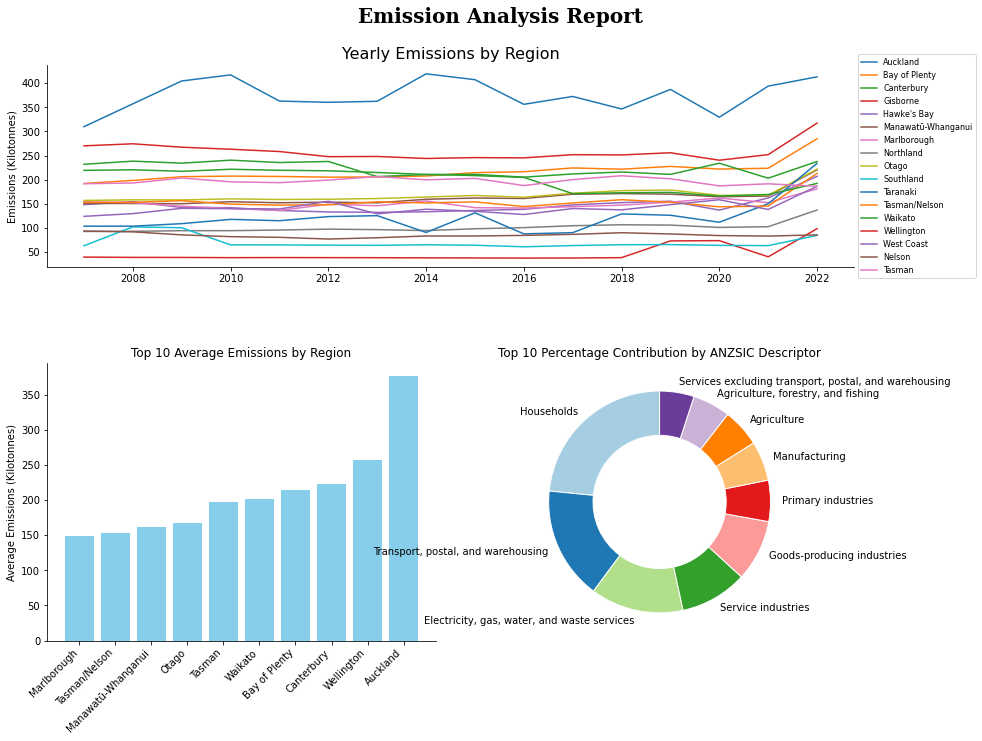

In [27]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Prepare figure and gridspec layout
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(nrows=8, ncols=8)

# Title of the overall figure
fig.suptitle(
    "Emission Analysis Report", fontsize=20, fontweight="bold", fontfamily="serif"
)

# Line Plot: Emissions by Region Over Time
ax1 = fig.add_subplot(gs[0:3, :])
for region in df['region'].unique():
    region_data = df[df['region'] == region].groupby('year')['data_val'].mean()
    ax1.plot(
        region_data.index,  # x-values are the years
        region_data.values,  # y-values are the mean emissions
        label=region
    )

ax1.set_title("Yearly Emissions by Region", fontsize=16)
ax1.set_ylabel("Emissions (Kilotonnes)")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)

# Bar Chart: Average Emissions by Region
ax2 = fig.add_subplot(gs[4:, :4])
avg_emissions_by_region = df.groupby('region')['data_val'].mean().sort_values()

# Focus on the top 10 regions
top_regions = avg_emissions_by_region[-10:]

ax2.bar(
    x=top_regions.index, 
    height=top_regions,
    color="skyblue"
)

ax2.set_title("Top 10 Average Emissions by Region")
ax2.set_xticks(range(len(top_regions.index)))
ax2.set_xticklabels(top_regions.index, rotation=45, ha='right')
ax2.set_ylabel("Average Emissions (Kilotonnes)")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# Pie Chart: Emissions Contribution by ANZSIC Descriptor (Excluding "Total")
ax3 = fig.add_subplot(gs[4:, 4:])
total_emissions_by_anzsic = df.groupby('anzsic_descriptor')['data_val'].sum()
total_emissions_by_anzsic = total_emissions_by_anzsic / total_emissions_by_anzsic.sum()

# Exclude "Total" and focus on the top 10 descriptors
top_anzsic = total_emissions_by_anzsic.drop('Total', errors='ignore').sort_values(ascending=False).head(10)

ax3.pie(
    top_anzsic,
    labels=top_anzsic.index,
    startangle=90,
    labeldistance=1.1,
    colors=plt.cm.Paired(range(len(top_anzsic))),
    wedgeprops=dict(width=0.4, edgecolor='w')
)

ax3.set_title("Top 10 Percentage Contribution by ANZSIC Descriptor", fontsize=12)

# Adjust spacing manually
plt.subplots_adjust(left=0.05, right=0.85, top=0.90, bottom=0.10, hspace=0.4, wspace=0.4)

plt.show()

# Comprehensive Emission Analysis Visualization

This notebook features a detailed analysis of emission data using various types of plots arranged in a comprehensive figure layout. The visualizations include a line plot, a horizontal bar chart, a pie chart, a heatmap, and a gauge chart, all organized using a gridspec layout for clarity and ease of interpretation.

## Overview

The visualizations included are:
- **Line Plot**: Emissions by region over time.
- **Horizontal Bar Chart**: Top 5 regions by total emissions.
- **Pie Chart**: Contribution of the top 5 regions.
- **Heatmap**: Correlation between different sectors.
- **Gauge Chart**: Achievement towards emission reduction goals.

## 1. Line Plot: Emissions by Region Over Time

This line plot shows the average emissions per year for different regions. Each line represents a region, providing insights into trends and variations in emissions over time. The plot includes a legend positioned outside the main plot area for better clarity.

## 2. Horizontal Bar Chart: Top 5 Regions by Total Emissions

The horizontal bar chart highlights the top 5 regions with the highest total emissions. This chart helps identify which regions are the largest contributors to total emissions. The bars are color-coded for easy comparison.

## 3. Pie Chart: Contribution of Top 5 Regions

This pie chart illustrates the percentage contribution of the top 5 regions to total emissions. It provides a clear view of how much each of the top regions contributes relative to the others.

## 4. Heatmap: Correlation Between Sectors

The heatmap shows the correlation between different emission sectors. This visualization helps in understanding the relationships between sectors and how they influence each other. The heatmap is color-coded to indicate the strength of correlations, with sector names rotated for readability.

## 5. Gauge Chart: Emission Goal Achievement

The gauge chart represents the achievement towards emission reduction goals. It displays the percentage of the goal that has been achieved using a pie chart format with a central text label showing the exact percentage.

## Layout and Design

The figure is arranged using a gridspec layout to ensure that each plot is clearly visible and properly spaced. Adjustments have been made to the size and position of each subplot for optimal readability and interpretation.


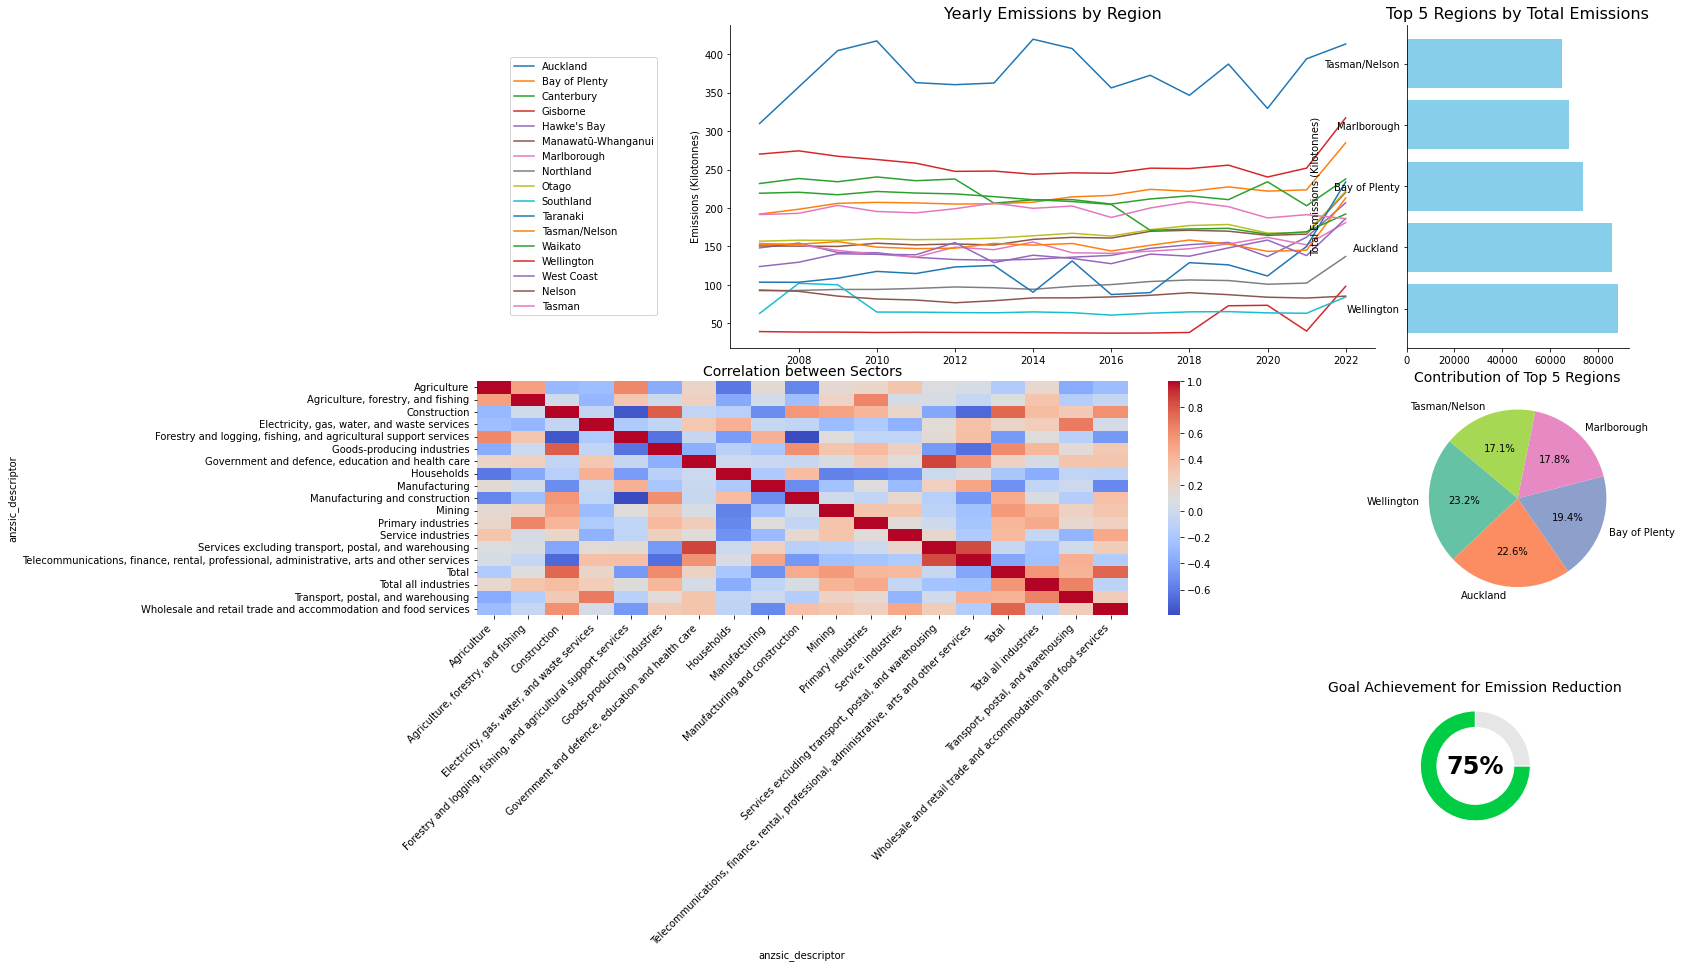

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

# Prepare a larger figure and gridspec layout with more spacing
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(nrows=12, ncols=14)

# 1. Line Plot: Emissions by Region Over Time
ax1 = fig.add_subplot(gs[0:4, 3:11])  # Adjusted to leave more space on the left for the legend
for region in df['region'].unique():
    region_data = df[df['region'] == region].groupby('year')['data_val'].mean()
    ax1.plot(region_data.index, region_data.values, label=region)

ax1.set_title("Yearly Emissions by Region", fontsize=16)
ax1.set_ylabel("Emissions (Kilotonnes)")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# Position the legend further left outside the plot area
ax1.legend(loc="center left", bbox_to_anchor=(-0.35, 0.5), fontsize=10)

# 2. Barh Chart: Top 5 Regions by Total Emissions
ax2 = fig.add_subplot(gs[0:4, 11:14])
top_regions = df.groupby('region')['data_val'].sum().sort_values(ascending=False).head(5)
ax2.barh(top_regions.index, top_regions.values, color='skyblue')
ax2.set_title("Top 5 Regions by Total Emissions", fontsize=16)
ax2.set_ylabel("Total Emissions (Kilotonnes)")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# 3. Pie Chart: Contribution of Top 5 Regions
ax3 = fig.add_subplot(gs[4:7, 11:14])
ax3.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
ax3.set_title("Contribution of Top 5 Regions", fontsize=14)

# 4. Heatmap: Correlation between Sectors
ax4 = fig.add_subplot(gs[4:7, 0:10])  # Adjusted to span more columns to improve readability
sector_corr = df.pivot_table(index='year', columns='anzsic_descriptor', values='data_val').corr()

sns.heatmap(sector_corr, annot=False, cmap='coolwarm', ax=ax4)
ax4.set_title("Correlation between Sectors", fontsize=14)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax4.set_yticklabels(ax4.get_yticklabels(), fontsize=10)

# 5. Gauge Chart: Emission Goal Achievement (Example Data)
ax5 = fig.add_subplot(gs[7:10, 11:13])  # Adjusted position for spacing
current_achievement = 0.75  # Example: 75% goal achieved
ax5.pie([current_achievement, 1 - current_achievement], startangle=90, colors=['#00cc44', '#e6e6e6'],
        wedgeprops=dict(width=0.3, edgecolor='w'))
ax5.text(0, 0, f'{int(current_achievement*100)}%', ha='center', va='center', fontsize=24, fontweight='bold')
ax5.set_title("Goal Achievement for Emission Reduction", fontsize=14)

# Adjust layout to ensure spacing and readability
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.05, hspace=0.6, wspace=0.6)

plt.show()

## Pairplot of Greenhouse Gas Emissions Data

The following pair plot visualizes the relationships and distributions of numerical columns in the greenhouse gas emissions dataset. 

- **Columns Analyzed**: `year` and `data_val`.
- **Purpose**: To explore how the emissions data correlates with time and to identify any patterns or trends.

The plot provides insights into the data's structure, revealing trends and potential correlations between the variables.

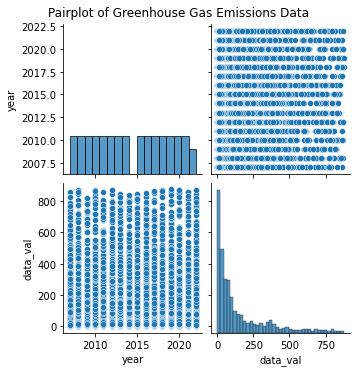

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns from your dataset
numerical_columns = df[['year', 'data_val']]  # Add more relevant columns if necessary

# Generate a pair plot
sns.pairplot(numerical_columns)
plt.suptitle("Pairplot of Greenhouse Gas Emissions Data", y=1.02)
plt.show()

## Analyzing Greenhouse Gas Emissions Over Time

In this analysis, we create more granular bins for the greenhouse gas emissions data and visualize the data over time. 

### Steps:
1. **Create Emission Bins**:
   - The `data_val` column is divided into bins with intervals of 50 kilotonnes, and each bin is labeled accordingly.
   - This helps categorize the emissions data into more manageable groups.

2. **Visualization**:
   - A scatter plot is generated using `sns.jointplot` to show the relationship between `year` and `data_val`.
   - The `hue` parameter is set to the newly created `emission_bins`, allowing us to differentiate the emissions levels using different colors.
   - The color palette used is `coolwarm` to represent the range of emissions visually.

This plot helps in understanding how greenhouse gas emissions have changed over time and how different levels of emissions are distributed across years.

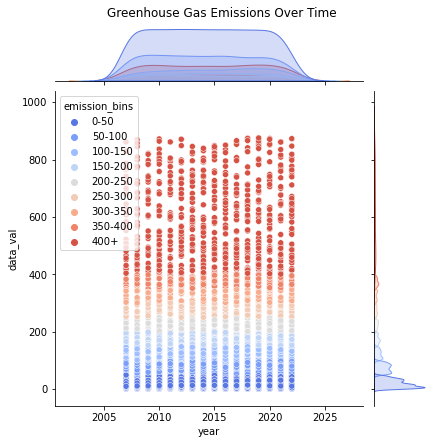

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create more granular bins for the 'data_val' (emissions)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, df['data_val'].max()]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400+']
df['emission_bins'] = pd.cut(df['data_val'], bins=bins, labels=labels)

# Plotting with 'hue' based on the more granular 'emission_bins'
sns.jointplot(x="year", y="data_val", kind="scatter", hue="emission_bins", data=df, palette="coolwarm")

plt.suptitle("Greenhouse Gas Emissions Over Time", y=1.02)
plt.show()

## Conclusion

This comprehensive analysis provides valuable insights into emissions trends, regional contributions, and sectoral impacts. The visualizations and statistical tests used offer a clear understanding of how emissions are distributed and how they have evolved over time.

## Next Steps

Further analysis could focus on:
- Detailed sectoral impacts and their specific trends.
- Comparison of emission reduction goals versus actual achievements.
- Advanced modeling techniques to predict future emission trends.